In [37]:
import pandas as pd

####### plot_color_gradients('Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'])

In [38]:
# Define file names and prefixes
files = {
    'AH': 'AH_FASTA_SSU_OTU.tsv',
    'CP': 'CP_FASTA_SSU_OTU.tsv',
    'EP': 'EP_FASTA_SSU_OTU.tsv',
    'TB': 'TB_FASTA_SSU_OTU.tsv'
}

dfs = []
for prefix, file in files.items():
    df = pd.read_csv(file, sep='\t', skiprows=1)
    df.columns = df.columns.str.replace('# ', '')
    df.rename(columns={'SSU_rRNA': f'{prefix}_SSU'}, inplace=True)
    dfs.append(df)

# Merge all DataFrames
merged = dfs[0]
for df in dfs[1:]:
    merged = pd.merge(merged, df, on=['OTU ID', 'taxonomy', 'taxid'], how='outer')

# Replace NaN with 0
merged.fillna(0, inplace=True)

# --- STEP 1: Rename columns ---
merged.rename(columns={
    'AH_SSU': 'AH',
    'CP_SSU': 'CP',
    'EP_SSU': 'EP',
    'TB_SSU': 'TB'
}, inplace=True)

# --- STEP 2: Reorder columns ---
column_order = ['OTU ID', 'taxonomy', 'taxid', 'AH', 'CP', 'EP', 'TB']
merged = merged[column_order]

# Save the combined table
merged.to_csv('combined_SSU_table.tsv', sep='\t', index=False)

In [39]:
# Load the combined table
combined_otu = pd.read_csv("combined_SSU_table.tsv", sep='\t')

In [40]:
combined_otu.head(20)
df = combined_otu

In [41]:
# Replace Firmicutes → Bacillota and Proteobacteria → Pseudomonadota
df["taxonomy"] = df["taxonomy"].str.replace(
    r"p__Firmicutes", "p__Bacillota", regex=True
)
df["taxonomy"] = df["taxonomy"].str.replace(
    r"p__Proteobacteria", "p__Pseudomonadota", regex=True
)

df["taxonomy"] = df["taxonomy"].str.replace(
    r"p__Actinobacteria", "p__Actinomycetota", regex=True
)

df["taxonomy"] = df["taxonomy"].str.replace(
    r"p__Bacteroidetes", "p__Bacteroidota", regex=True
)

df["taxonomy"] = df["taxonomy"].str.replace(
    r"p__Planctomycetes", "p__Planctomycetota", regex=True
)

df["taxonomy"] = df["taxonomy"].str.replace(
    r"p__Acidobacteria", "p__Acidobacteriota", regex=True
)

df["taxonomy"] = df["taxonomy"].str.replace(
    r"p__Cyanobacteria", "p__Cyanobacteriota", regex=True
)


# Save the updated table
df.to_csv("updated_SSU_table.tsv", sep="\t", index=False)

In [42]:
df.head(20)

,OTU ID,taxonomy,taxid,AH,CP,EP,TB
0,2614,sk__Bacteria;k__;p__Verrucomicrobia;c__Opituta...,134623,2.0,0.0,1.0,0.0
1,4413,sk__Bacteria;k__;p__Bacteroidota;c__Cytophagia...,299566,2.0,0.0,0.0,1.0
2,5608,sk__Bacteria;k__;p__Pseudomonadota;c__Epsilonp...,72294,0.0,1.0,0.0,0.0
3,5646,sk__Bacteria;k__;p__Pseudomonadota;c__Alphapro...,361177,1.0,0.0,1.0,0.0
4,5820,sk__Bacteria,2,23.0,27.0,23.0,31.0
5,5882,sk__Bacteria;k__;p__Pseudomonadota;c__Gammapro...,321662,3.0,6.0,11.0,1.0
6,7234,sk__Bacteria;k__;p__Bacillota;c__Clostridia;o_...,76008,0.0,2.0,0.0,0.0
7,7909,sk__Eukaryota;k__;p__Cercozoa;c__Thecofilosea;...,981201,1.0,1.0,0.0,0.0
8,8060,sk__Bacteria;k__;p__Pseudomonadota;c__Alphapro...,82115,2.0,0.0,0.0,1.0
9,9760,sk__Bacteria;k__;p__Pseudomonadota;c__Alphapro...,28211,8.0,4.0,3.0,4.0


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined table
df = pd.read_csv('updated_SSU_table.tsv', sep='\t')

# Parse taxonomy into separate columns (phylum, class, etc.)
def parse_taxonomy(taxonomy):
    levels = {'phylum': 'p__', 'class': 'c__', 'order': 'o__', 
              'family': 'f__', 'genus': 'g__', 'species': 's__'}
    parsed = {}
    for level, prefix in levels.items():
        matches = [part.split(prefix)[1] for part in taxonomy.split(';') if prefix in part]
        parsed[level] = matches[0] if matches else 'Unclassified'
    return parsed

# Add parsed taxonomic levels
df = pd.concat([df, df['taxonomy'].apply(parse_taxonomy).apply(pd.Series)], axis=1)

# Melt to long format for grouping
melted = df.melt(
    id_vars=['OTU ID', 'taxonomy', 'taxid', 'phylum', 'class', 'order', 'family', 'genus', 'species'],
    value_vars=['AH', 'CP', 'EP', 'TB'],
    var_name='Sample',
    value_name='Count'
)

In [44]:
# Choose taxonomic level (e.g., 'phylum', 'class', etc.)
tax_level = 'phylum'

# Group by sample and taxon, then sum counts
agg_df = melted.groupby(['Sample', tax_level])['Count'].sum().reset_index()

# Pivot to wide format (samples as columns)
pivot_df = agg_df.pivot(index='Sample', columns=tax_level, values='Count').fillna(0)

# Optional: Keep top N taxa + group others
top_n = 10
top_taxa = pivot_df.sum().nlargest(15).index
pivot_df['Other'] = pivot_df.drop(top_taxa, axis=1).sum(axis=1)
pivot_df = pivot_df[top_taxa.union(['Other'])]

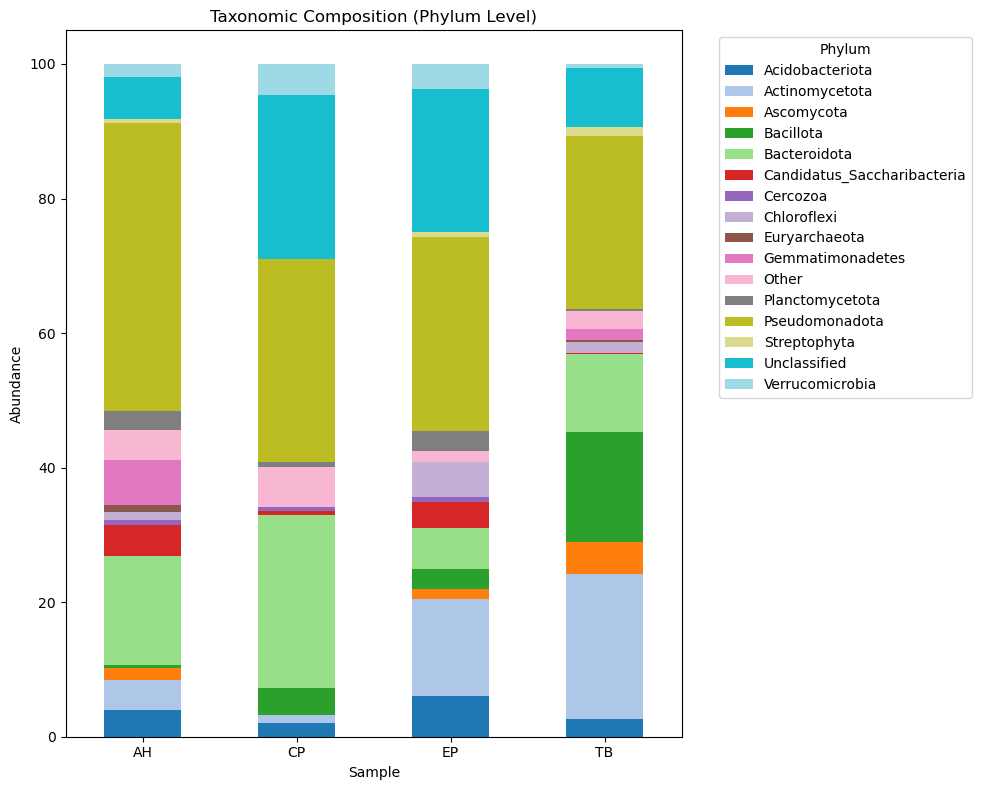

In [46]:
# Create stacked bar plot
plt.figure(figsize=(10, 8))
pivot_df.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

# Convert counts to percentages
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Format plot
plt.title(f'Taxonomic Composition ({tax_level.capitalize()} Level)')
plt.xlabel('Sample')
plt.ylabel('Abundance')
plt.xticks(rotation=0)
plt.legend(title=tax_level.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
output_filename = f"Taxonomic_Composition_{tax_level.capitalize()}.tiff"
plt.savefig(output_filename, format='tiff', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [47]:
# Choose taxonomic level (e.g., 'phylum', 'class', etc.)
tax_level_C = 'class'

# Group by sample and taxon, then sum counts
agg_df = melted.groupby(['Sample', tax_level_C])['Count'].sum().reset_index()

# Pivot to wide format (samples as columns)
pivot_df = agg_df.pivot(index='Sample', columns=tax_level_C, values='Count').fillna(0)

# Optional: Keep top N taxa + group others
top_n = 10
top_taxa = pivot_df.sum().nlargest(19).index
pivot_df['Other'] = pivot_df.drop(top_taxa, axis=1).sum(axis=1)
pivot_df = pivot_df[top_taxa.union(['Other'])]

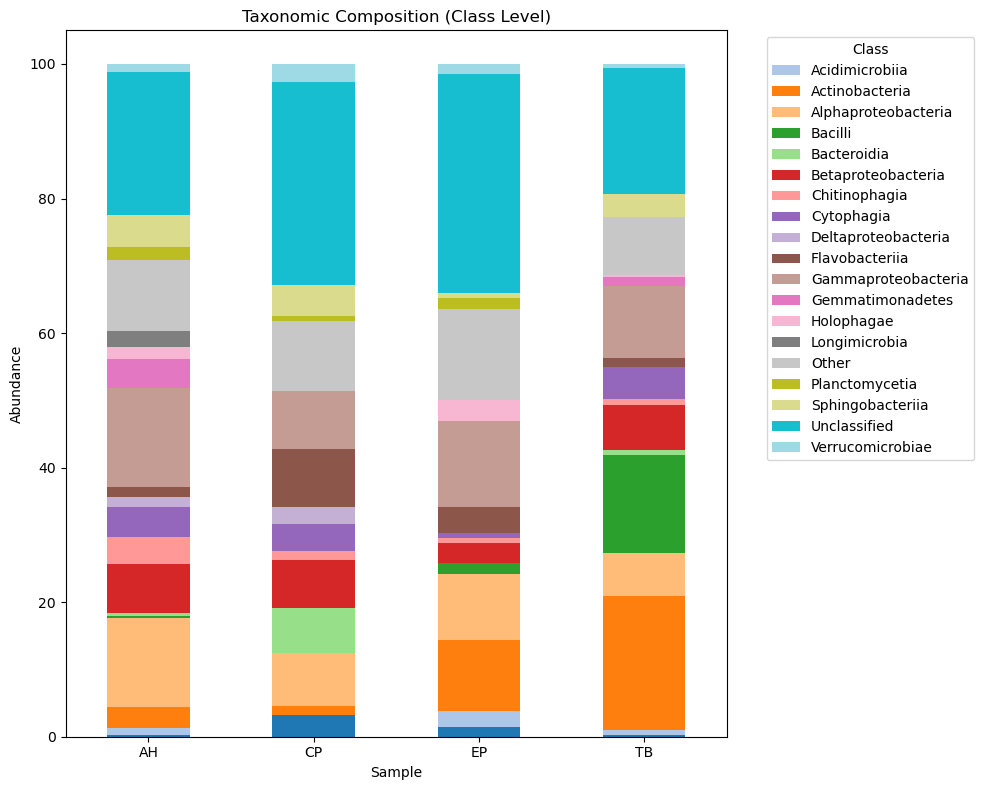

In [50]:
# Create stacked bar plot
plt.figure(figsize=(10, 8))
pivot_df.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

# Convert counts to percentages
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Format plot
plt.title(f'Taxonomic Composition ({tax_level_C.capitalize()} Level)')
plt.xlabel('Sample')
plt.ylabel('Abundance')
plt.xticks(rotation=0)
plt.legend(title=tax_level_C.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
# Save the figure in TIFF format with high resolution
output_filename = f"Taxonomic_Composition_{tax_level_C.capitalize()}.tiff"
plt.savefig(output_filename, format='tiff', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [52]:
# Choose taxonomic level (e.g., 'phylum', 'class', etc.)
tax_level_G = 'genus'

# Group by sample and taxon, then sum counts
agg_df = melted.groupby(['Sample', tax_level_G])['Count'].sum().reset_index()

# Pivot to wide format (samples as columns)
pivot_df = agg_df.pivot(index='Sample', columns=tax_level_G, values='Count').fillna(0)

# Optional: Keep top N taxa + group others
top_n = 10
top_taxa = pivot_df.sum().nlargest(19).index
pivot_df['Other'] = pivot_df.drop(top_taxa, axis=1).sum(axis=1)
pivot_df = pivot_df[top_taxa.union(['Other'])]

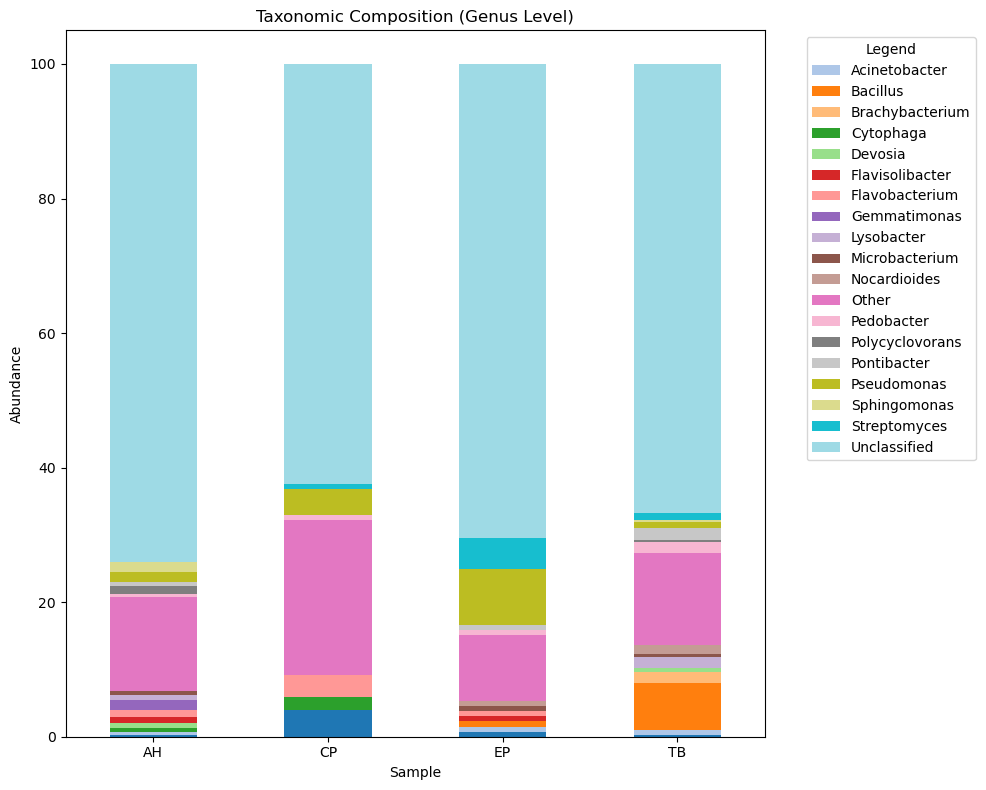

In [54]:
# Create stacked bar plot
plt.figure(figsize=(10, 8))
pivot_df.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

# Convert counts to percentages
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Format plot
plt.title(f'Taxonomic Composition ({tax_level_G.capitalize()} Level)')
plt.xlabel('Sample')
plt.ylabel('Abundance')
plt.xticks(rotation=0)
plt.legend(title="Legend".capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
output_filename = f"Taxonomic_Composition_{tax_level_G.capitalize()}.tiff"
plt.savefig(output_filename, format='tiff', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [56]:
# Choose taxonomic level (e.g., 'phylum', 'class', etc.)
tax_level_S = 'species'

# Group by sample and taxon, then sum counts
agg_df = melted.groupby(['Sample', tax_level_S])['Count'].sum().reset_index()

# Pivot to wide format (samples as columns)
pivot_df = agg_df.pivot(index='Sample', columns=tax_level_S, values='Count').fillna(0)

# Optional: Keep top N taxa + group others
top_n = 10
top_taxa = pivot_df.sum().nlargest(20).index
pivot_df['Other'] = pivot_df.drop(top_taxa, axis=1).sum(axis=1)
pivot_df = pivot_df[top_taxa.union(['Other'])]

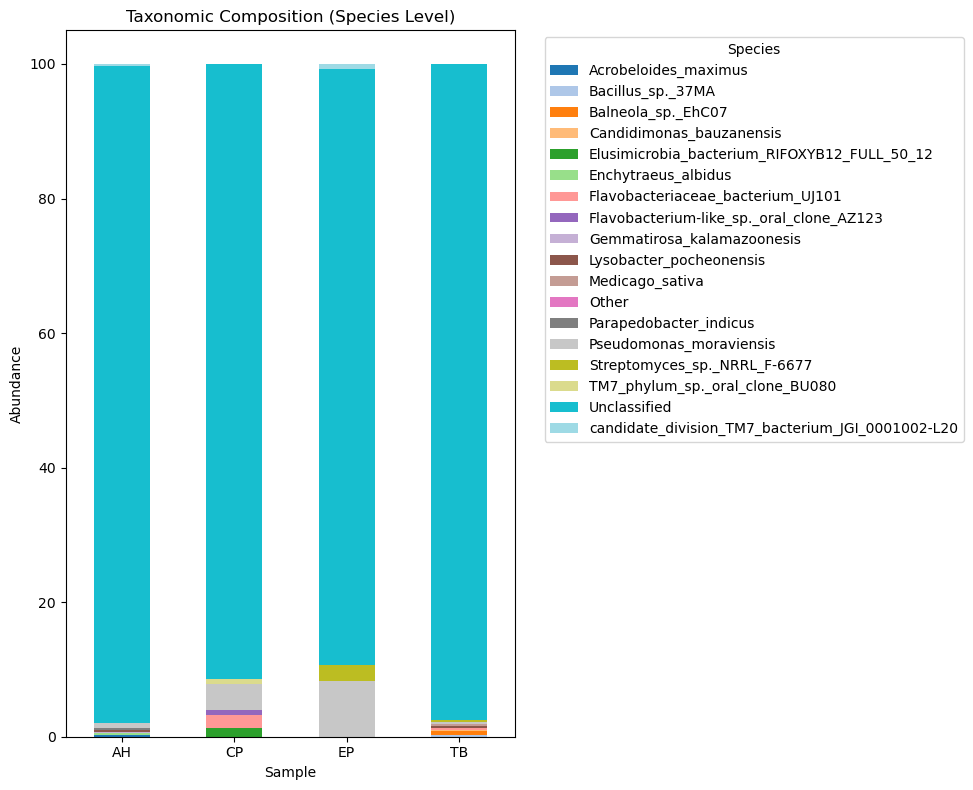

In [58]:
# Create stacked bar plot
plt.figure(figsize=(10, 8))
pivot_df.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

# Convert counts to percentages
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Format plot
plt.title(f'Taxonomic Composition ({tax_level_S.capitalize()} Level)')
plt.xlabel('Sample')
plt.ylabel('Abundance')
plt.xticks(rotation=0)
plt.legend(title=tax_level_S.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
output_filename = f"Taxonomic_Composition_{tax_level_S.capitalize()}.tiff"
plt.savefig(output_filename, format='tiff', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

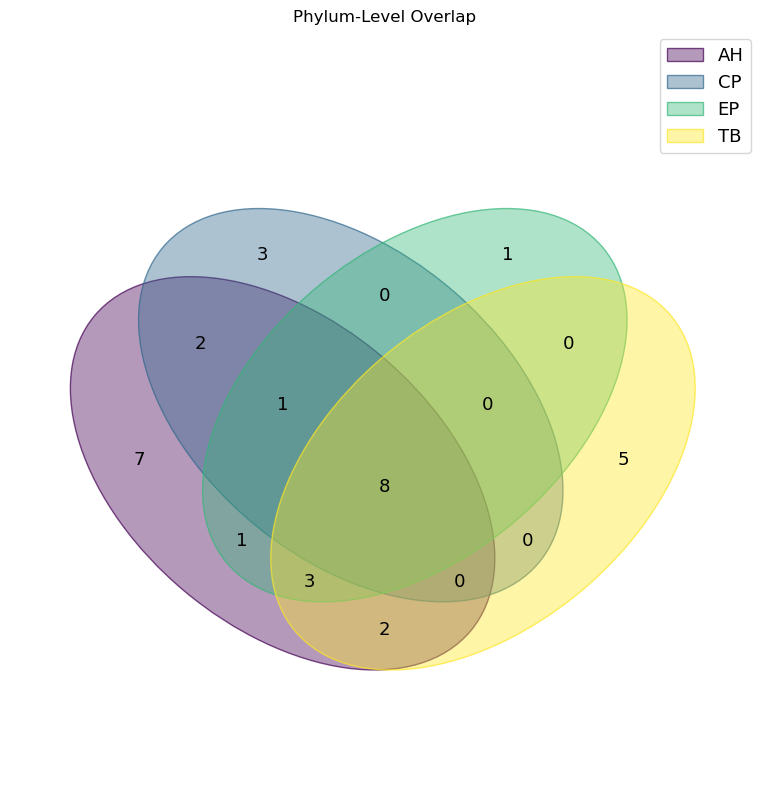

In [59]:
import pandas as pd
from venn import venn
import matplotlib.pyplot as plt

# Load the combined table
df = pd.read_csv('updated_SSU_table.tsv', sep='\t')

# Parse taxonomy (e.g., phylum level)
def parse_taxonomy(taxonomy):
    for part in taxonomy.split(';'):
        if part.startswith('p__'):  # Replace with 'c__', 'o__', etc.
            return part.split('p__')[1]
    return 'Unclassified'

df['phylum'] = df['taxonomy'].apply(parse_taxonomy)

# Define samples
samples = ['AH', 'CP', 'EP', 'TB']

# Extract unique taxa for each sample
taxa_sets = {}
for sample in samples:
    taxa = set(df[df[sample] > 0]['phylum'].unique())
    taxa.discard('Unclassified')  # Remove unclassified entries
    taxa_sets[sample] = taxa

# Plot 4-way Venn diagram
# Create the Venn diagram
plt.figure(figsize=(6, 6))
venn(taxa_sets, cmap='viridis')  # Assuming 'venn' is either venn2 or venn3 based on the number of sets
plt.title("Phylum-Level Overlap")

# Save the figure in TIFF format with high resolution
output_filename = "Phylum_Level_Overlap.tiff"
plt.savefig(output_filename, format='tiff', dpi=300, bbox_inches='tight')

plt.tight_layout()

# Display the plot
plt.show()

<Figure size 600x600 with 0 Axes>

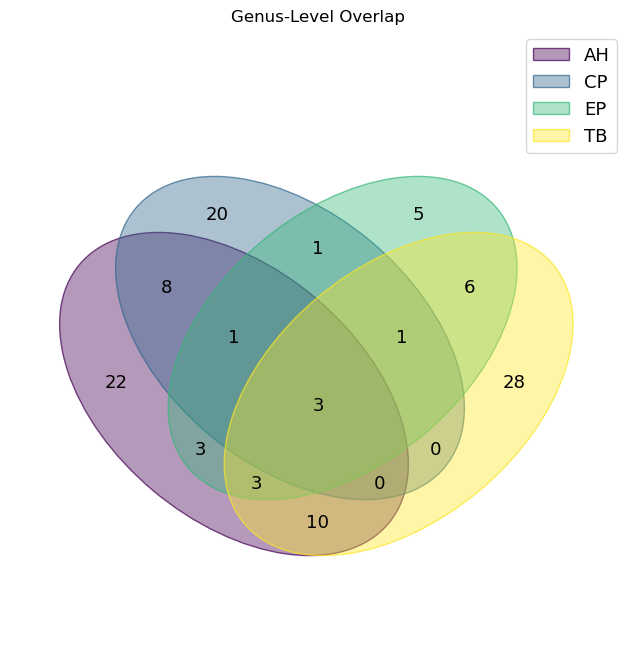

In [61]:
import pandas as pd
from venn import venn
import matplotlib.pyplot as plt

# Load the combined table
df = pd.read_csv('combined_SSU_table.tsv', sep='\t')

# Parse taxonomy (e.g., phylum level)
def parse_taxonomy(taxonomy):
    for part in taxonomy.split(';'):
        if part.startswith('g__'):  # Replace with 'c__', 'o__', etc.
            return part.split('g__')[1]
    return 'Unclassified'

df['genus'] = df['taxonomy'].apply(parse_taxonomy)

# Define samples
samples = ['AH', 'CP', 'EP', 'TB']

# Extract unique taxa for each sample
taxa_sets = {}
for sample in samples:
    taxa = set(df[df[sample] > 0]['genus'].unique())
    taxa.discard('Unclassified')  # Remove unclassified entries
    taxa_sets[sample] = taxa

# Plot 4-way Venn diagram
# Create the Venn diagram
plt.figure(figsize=(6, 6))
venn(taxa_sets, cmap='viridis')  # Assuming 'venn' is either venn2 or venn3 based on the number of sets
plt.title("Genus-Level Overlap")

# Save the figure in TIFF format with high resolution
output_filename = "Genus_Level_Overlap.tiff"
plt.savefig(output_filename, format='tiff', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

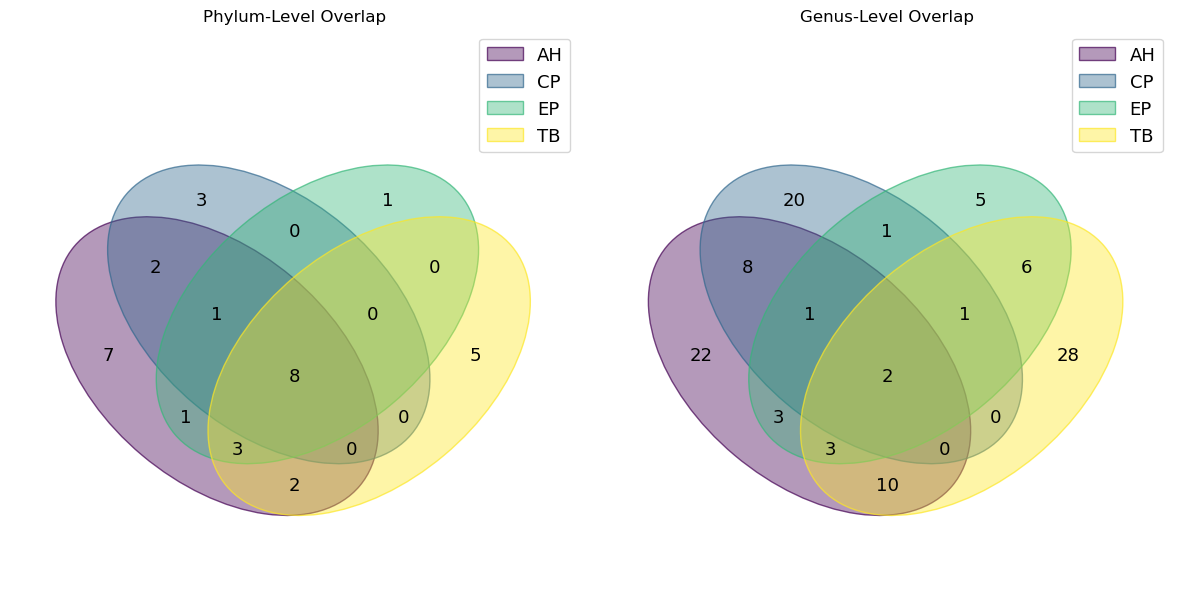

In [64]:
import pandas as pd
from venn import venn
import matplotlib.pyplot as plt

# Load the combined tables
df_phylum = pd.read_csv('updated_SSU_table.tsv', sep='\t')
df_genus = pd.read_csv('updated_SSU_table.tsv', sep='\t')

# Function to parse taxonomy at different levels
def parse_taxonomy(taxonomy, level):
    for part in taxonomy.split(';'):
        if part.startswith(level):
            return part.split(level)[1]
    return 'Unclassified'

# Process phylum-level data
df_phylum['phylum'] = df_phylum['taxonomy'].apply(lambda x: parse_taxonomy(x, 'p__'))
# Process genus-level data
df_genus['genus'] = df_genus['taxonomy'].apply(lambda x: parse_taxonomy(x, 'g__'))

# Define samples
samples = ['AH', 'CP', 'EP', 'TB']

# Extract unique taxa for each sample (phylum level)
taxa_sets_phylum = {}
for sample in samples:
    taxa = set(df_phylum[df_phylum[sample] > 0]['phylum'].unique())
    taxa.discard('Unclassified')  # Remove unclassified entries
    taxa_sets_phylum[sample] = taxa

# Extract unique taxa for each sample (genus level)
taxa_sets_genus = {}
for sample in samples:
    taxa = set(df_genus[df_genus[sample] > 0]['genus'].unique())
    taxa.discard('Unclassified')  # Remove unclassified entries
    taxa.discard('')
    taxa_sets_genus[sample] = taxa

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot phylum-level Venn diagram
venn(taxa_sets_phylum, cmap='viridis', ax=axes[0])
axes[0].set_title("Phylum-Level Overlap")

# Plot genus-level Venn diagram
venn(taxa_sets_genus, cmap='viridis', ax=axes[1])
axes[1].set_title("Genus-Level Overlap")

# Save the figure in TIFF format with high resolution
output_filename = "Phylum_Genus_Level_Overlap_1.tiff"
plt.savefig(output_filename, format='tiff', dpi=300, bbox_inches='tight')

plt.tight_layout()

# Display the plots
plt.show()


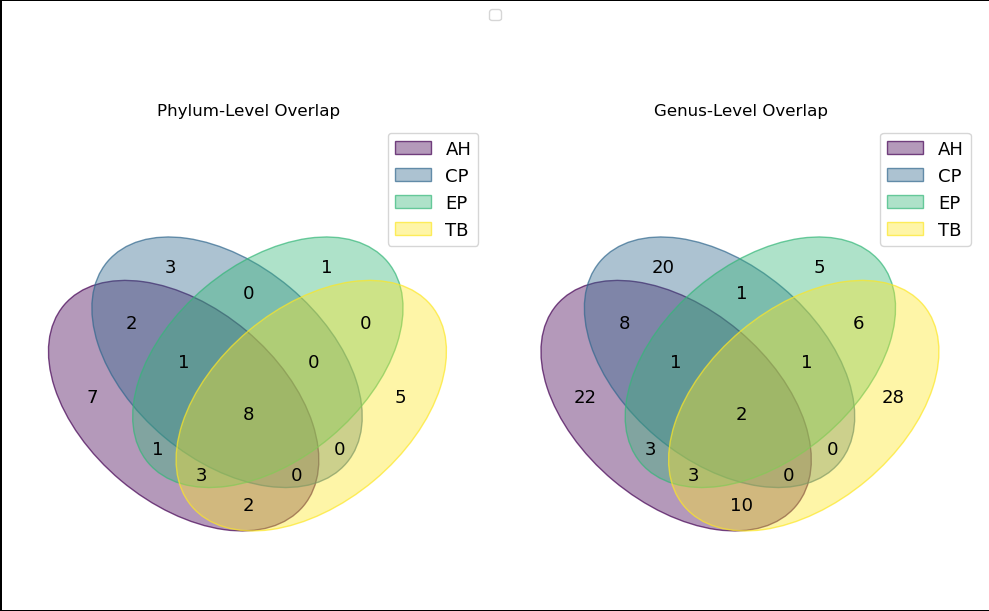

In [65]:
import pandas as pd
from venn import venn
import matplotlib.pyplot as plt

# Load the combined tables
df_phylum = pd.read_csv('updated_SSU_table.tsv', sep='\t')
df_genus = pd.read_csv('updated_SSU_table.tsv', sep='\t')

# Function to parse taxonomy at different levels
def parse_taxonomy(taxonomy, level):
    for part in taxonomy.split(';'):
        if part.startswith(level):
            return part.split(level)[1]
    return 'Unclassified'

# Process phylum-level data
df_phylum['phylum'] = df_phylum['taxonomy'].apply(lambda x: parse_taxonomy(x, 'p__'))
# Process genus-level data
df_genus['genus'] = df_genus['taxonomy'].apply(lambda x: parse_taxonomy(x, 'g__'))

# Define samples
samples = ['AH', 'CP', 'EP', 'TB']

# Extract unique taxa for each sample (phylum level)
taxa_sets_phylum = {}
for sample in samples:
    taxa = set(df_phylum[df_phylum[sample] > 0]['phylum'].unique())
    taxa.discard('Unclassified')  # Remove unclassified entries
    taxa_sets_phylum[sample] = taxa

# Extract unique taxa for each sample (genus level)
taxa_sets_genus = {}
for sample in samples:
    taxa = set(df_genus[df_genus[sample] > 0]['genus'].unique())
    taxa.discard('Unclassified')  # Remove unclassified entries
    taxa.discard('')
    taxa_sets_genus[sample] = taxa

# Create subplots with a border
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.patch.set_linewidth(2)
fig.patch.set_edgecolor('black')

# Plot phylum-level Venn diagram
venn_plot1 = venn(taxa_sets_phylum, cmap='viridis', ax=axes[0])
axes[0].set_title("Phylum-Level Overlap")

# Plot genus-level Venn diagram
venn_plot2 = venn(taxa_sets_genus, cmap='viridis', ax=axes[1])
axes[1].set_title("Genus-Level Overlap")

# Create a single legend for both subplots
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.1))

# Save the figure in TIFF format with high resolution
output_filename = "Phylum_Genus_Level_Overlap_2.tiff"
plt.savefig(output_filename, format='tiff', dpi=300, bbox_inches='tight')

plt.tight_layout()

# Display the plots
plt.show()


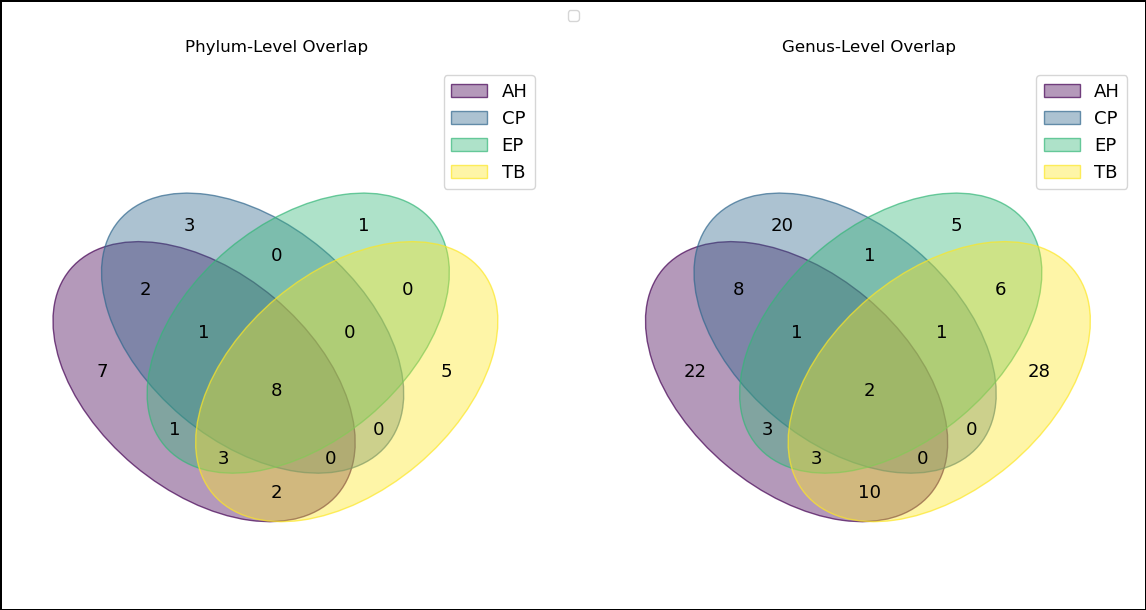

In [66]:
import pandas as pd
from venn import venn
import matplotlib.pyplot as plt

# Load the combined tables
df_phylum = pd.read_csv('updated_SSU_table.tsv', sep='\t')
df_genus = pd.read_csv('updated_SSU_table.tsv', sep='\t')

# Function to parse taxonomy at different levels
def parse_taxonomy(taxonomy, level):
    for part in taxonomy.split(';'):
        if part.startswith(level):
            return part.split(level)[1]
    return 'Unclassified'

# Process phylum-level data
df_phylum['phylum'] = df_phylum['taxonomy'].apply(lambda x: parse_taxonomy(x, 'p__'))
# Process genus-level data
df_genus['genus'] = df_genus['taxonomy'].apply(lambda x: parse_taxonomy(x, 'g__'))

# Define samples
samples = ['AH', 'CP', 'EP', 'TB']

# Extract unique taxa for each sample (phylum level)
taxa_sets_phylum = {}
for sample in samples:
    taxa = set(df_phylum[df_phylum[sample] > 0]['phylum'].unique())
    taxa.discard('Unclassified')  # Remove unclassified entries
    taxa_sets_phylum[sample] = taxa

# Extract unique taxa for each sample (genus level)
taxa_sets_genus = {}
for sample in samples:
    taxa = set(df_genus[df_genus[sample] > 0]['genus'].unique())
    taxa.discard('Unclassified')  # Remove unclassified entries
    taxa.discard('')
    taxa_sets_genus[sample] = taxa

# Create subplots with a border
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.patch.set_linewidth(2)
fig.patch.set_edgecolor('black')

# Plot phylum-level Venn diagram
venn_plot1 = venn(taxa_sets_phylum, cmap='viridis', ax=axes[0])
axes[0].set_title("Phylum-Level Overlap", pad=10)

# Plot genus-level Venn diagram
venn_plot2 = venn(taxa_sets_genus, cmap='viridis', ax=axes[1])
axes[1].set_title("Genus-Level Overlap", pad=10)

# Create a single legend for both subplots
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.02))

# Save the figure in TIFF format with high resolution
output_filename = "Phylum_Genus_Level_Overlap_3.tiff"
plt.savefig(output_filename, format='tiff', dpi=300, bbox_inches='tight')

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plots
plt.show()


In [68]:
import pandas as pd

# Load the combined tables
df_phylum = pd.read_csv('updated_SSU_table.tsv', sep='\t')
df_genus = pd.read_csv('updated_SSU_table.tsv', sep='\t')

# Function to parse taxonomy at different levels
def parse_taxonomy(taxonomy, level):
    for part in taxonomy.split(';'):
        if part.startswith(level):
            return part.split(level)[1]
    return 'Unclassified'

# Process phylum-level data
df_phylum['phylum'] = df_phylum['taxonomy'].apply(lambda x: parse_taxonomy(x, 'p__'))
# Process genus-level data
df_genus['genus'] = df_genus['taxonomy'].apply(lambda x: parse_taxonomy(x, 'g__'))

# Define samples
samples = ['AH', 'CP', 'EP', 'TB']

# Extract unique taxa for each sample (phylum level)
taxa_sets_phylum = {}
for sample in samples:
    taxa = set(df_phylum[df_phylum[sample] > 0]['phylum'].unique())
    taxa.discard('Unclassified')  # Remove unclassified entries
    taxa_sets_phylum[sample] = taxa

# Extract unique taxa for each sample (genus level)
taxa_sets_genus = {}
for sample in samples:
    taxa = set(df_genus[df_genus[sample] > 0]['genus'].unique())
    taxa.discard('Unclassified')  # Remove unclassified entries
    taxa.discard('')
    taxa_sets_genus[sample] = taxa

# Find overlapping elements across all samples
common_phylum = set.intersection(*taxa_sets_phylum.values())
common_genus = set.intersection(*taxa_sets_genus.values())

# Output results
print("Common Phylum across all samples:", common_phylum)
print("Common Genus across all samples:", common_genus)


Common Phylum across all samples: {'Verrucomicrobia', 'Bacillota', 'Actinomycetota', 'Pseudomonadota', 'Bacteroidota', 'Planctomycetota', 'Acidobacteriota', 'Candidatus_Saccharibacteria'}
Common Genus across all samples: {'Pedobacter', 'Pseudomonas'}


In [70]:
import pandas as pd

# Load the combined tables
df_phylum = pd.read_csv('updated_SSU_table.tsv', sep='\t')
df_genus = pd.read_csv('updated_SSU_table.tsv', sep='\t')

# Function to parse taxonomy at different levels
def parse_taxonomy(taxonomy, level):
    for part in taxonomy.split(';'):
        if part.startswith(level):
            return part.split(level)[1]
    return None  # Return None instead of 'Unclassified' to remove it easily

# Process phylum-level data
df_phylum['phylum'] = df_phylum['taxonomy'].apply(lambda x: parse_taxonomy(x, 'p__'))

# Process genus-level data
df_genus['genus'] = df_genus['taxonomy'].apply(lambda x: parse_taxonomy(x, 'g__'))

# Define samples
samples = ['AH', 'CP', 'EP', 'TB']

# Extract unique taxa for each sample (phylum level)
taxa_sets_phylum = {
    sample: set(df_phylum[(df_phylum[sample] > 0) & df_phylum['phylum'].notna()]['phylum'].unique())
    for sample in samples
}

# Extract unique taxa for each sample (genus level)
taxa_sets_genus = {
    sample: set(df_genus[(df_genus[sample] > 0) & df_genus['genus'].notna()]['genus'].unique())
    for sample in samples
}

# Combine all unique taxa across all samples
all_phyla = set.union(*taxa_sets_phylum.values())
all_genera = set.union(*taxa_sets_genus.values())

# Categorize taxa based on their presence in different sample counts and track sample names
def categorize_taxa(taxa_sets, all_taxa):
    taxa_counts = {taxon: [sample for sample in samples if taxon in taxa_sets[sample]] for taxon in all_taxa}
    
    taxa_4 = {k: v for k, v in taxa_counts.items() if len(v) == 4}  # Present in all 4 samples
    taxa_3 = {k: v for k, v in taxa_counts.items() if len(v) == 3}  # Present in exactly 3 samples
    taxa_2 = {k: v for k, v in taxa_counts.items() if len(v) == 2}  # Present in exactly 2 samples
    taxa_1 = {k: v for k, v in taxa_counts.items() if len(v) == 1}  # Present in only 1 sample
    
    return taxa_4, taxa_3, taxa_2, taxa_1

# Categorize phyla
phylum_4, phylum_3, phylum_2, phylum_1 = categorize_taxa(taxa_sets_phylum, all_phyla)
# Categorize genera
genus_4, genus_3, genus_2, genus_1 = categorize_taxa(taxa_sets_genus, all_genera)

# Output results with sample names
print(f"Phylum found in all 4 samples ({len(phylum_4)}):", list(phylum_4.keys()))
print("\nPhylum found in exactly 3 samples:")
for taxon, sample_list in phylum_3.items():
    print(f"  - {taxon}: {sample_list}")

print("\nPhylum found in exactly 2 samples:")
for taxon, sample_list in phylum_2.items():
    print(f"  - {taxon}: {sample_list}")

print("\nPhylum found in only 1 sample:")
for taxon, sample_list in phylum_1.items():
    print(f"  - {taxon}: {sample_list}")


print("\n")

print(f"Genus found in all 4 samples ({len(genus_4)}):", list(genus_4.keys()))
print("\nGenus found in exactly 3 samples:")
for taxon, sample_list in genus_3.items():
    print(f"  - {taxon}: {sample_list}")

print("\nGenus found in exactly 2 samples:")
for taxon, sample_list in genus_2.items():
    print(f"  - {taxon}: {sample_list}")

print("\nGenus found in only 1 sample:")
for taxon, sample_list in genus_1.items():
    print(f"  - {taxon}: {sample_list}")


Phylum found in all 4 samples (8): ['Bacillota', 'Actinomycetota', 'Pseudomonadota', 'Planctomycetota', 'Acidobacteriota', 'Candidatus_Saccharibacteria', 'Verrucomicrobia', 'Bacteroidota']

Phylum found in exactly 3 samples:
  - Streptophyta: ['AH', 'EP', 'TB']
  - Chloroflexi: ['AH', 'EP', 'TB']
  - Cercozoa: ['AH', 'CP', 'EP']
  - Ascomycota: ['AH', 'EP', 'TB']

Phylum found in exactly 2 samples:
  - : ['AH', 'CP']
  - Ciliophora: ['AH', 'EP']
  - Gemmatimonadetes: ['AH', 'TB']
  - Nematoda: ['AH', 'CP']
  - Euryarchaeota: ['AH', 'TB']

Phylum found in only 1 sample:
  - Candidatus_Levybacteria: ['AH']
  - Candidatus_Nomurabacteria: ['AH']
  - Elusimicrobia: ['CP']
  - Nitrospirae: ['TB']
  - Armatimonadetes: ['AH']
  - Balneolaeota: ['TB']
  - Candidatus_Kaiserbacteria: ['AH']
  - Thaumarchaeota: ['TB']
  - Annelida: ['AH']
  - Basidiomycota: ['AH']
  - Arthropoda: ['TB']
  - Calditrichaeota: ['TB']
  - Candidatus_Zambryskibacteria: ['AH']
  - Cyanobacteriota: ['EP']
  - Euglenozoa: